In [ ]:
# library(dplyr)
library(ggplot2)
library(ggbeeswarm)

In [2]:
## genotype file
genos = read.table("/hps/nobackup/hipsci/scratch/genotypes/imputed/2017-03-27/Anna_selection_2020/neuroseq_Jan27.dosages.txt")
colnames(genos) = gsub("\\.","-",colnames(genos))
head(genos)

HPSI0514i-sohd_2 HPSI0115i-zihe_1 HPSI1014i-eesb_1
13_21085751_A_T 0.902            0.935            0.387           
13_21088717_T_C 0.914            0.947            0.671           
13_21131211_C_A 0.731            0.005            1.112           
13_21151047_T_C 1.000            1.000            2.000           
13_21200260_C_T 1.001            1.468            1.010           
13_21258328_T_C 1.000            0.988            1.000           
                HPSI0913i-eika_2 HPSI0114i-lexy_2 HPSI1014i-quls_2
13_21085751_A_T 0                0.357            0.005           
13_21088717_T_C 0                0.336            0.015           
13_21131211_C_A 1                0.996            0.992           
13_21151047_T_C 1                1.000            1.000           
13_21200260_C_T 1                1.951            1.578           
13_21258328_T_C 1                1.000            1.000           
                HPSI0514i-yewo_4 HPSI0314i-bubh_3 HPSI0714i-burb_1
13_21085751_A_T 0.019            0.681            0.605           
13_21088717_T_C 0.001            0.962            0.609           
13_21131211_C_A 1.033            0.999            0.006           
13_21151047_T_C 0.999            0.000            0.000           
13_21200260_C_T 1.077            2.000            1.999           
13_21258328_T_C 0.003            1.000            2.000           
                HPSI0314i-xugn_2 ⋯ HPSI0413i-nudd_1 HPSI0513i-pedc_1
13_21085751_A_T 0.768            ⋯ 0.025            0.313           
13_21088717_T_C 0.783            ⋯ 0.011            0.312           
13_21131211_C_A 1.006            ⋯ 1.994            1.000           
13_21151047_T_C 0.000            ⋯ 0.000            0.000           
13_21200260_C_T 2.000            ⋯ 2.000            1.982           
13_21258328_T_C 1.000            ⋯ 0.003            1.000           
                HPSI0513i-dulv_1 HPSI0813i-peoj_1 HPSI0413i-yotv_2
13_21085751_A_T 0.008            1.027            0.004           
13_21088717_T_C 0.003            1.014            0.000           
13_21131211_C_A 0.003            0.002            0.966           
13_21151047_T_C 0.000            0.000            0.956           
13_21200260_C_T 2.000            2.000            1.007           
13_21258328_T_C 2.000            2.000            1.000           
                HPSI0513i-dipe_1 HPSI0613i-bawa_1 HPSI0813i-aizi_3
13_21085751_A_T 0.028            0.896            0.929           
13_21088717_T_C 0.018            0.977            0.940           
13_21131211_C_A 1.027            0.998            0.000           
13_21151047_T_C 0.000            0.002            0.000           
13_21200260_C_T 2.000            2.000            2.000           
13_21258328_T_C 0.995            0.981            2.000           
                HPSI0613i-hikj_2 HPSI0513i-momt_2
13_21085751_A_T 0.016            0.944           
13_21088717_T_C 0.007            0.993           
13_21131211_C_A 0.996            0.005           
13_21151047_T_C 1.000            0.000           
13_21200260_C_T 1.004            2.000           
13_21258328_T_C 1.000            2.000

In [3]:
### annotation file (map genes IDs)
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
# head(annos,2)
annos$feature_id = annos$ensembl_gene_id
head(annos,2)

feature_id      chromosome start    end      hgnc_symbol
1 ENSG00000000003 X          99883667 99894988 TSPAN6     
2 ENSG00000000419 20         49551404 49575092 DPM1       
  combined_feature_id    ensembl_gene_id
1 ENSG00000000003_TSPAN6 ENSG00000000003
2 ENSG00000000419_DPM1   ENSG00000000419

In [4]:
#### full expressino files (grouped by celltype, pool, donor, treatment)
mydir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/'
Epen1 = 'pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.celltype.Epen1.groupedby.donor_id-celltype-treatment.mean.tsv'
e_Epen1 = read.csv(paste0(mydir,Epen1),sep="\t")

In [5]:
e = e_Epen1
e_ROT = e[e$treatment == "ROT",]
rownames(e_ROT) = e_ROT$donor_id
e_noROT = e[e$treatment == "NONE",]
rownames(e_noROT) = e_noROT$donor_id

In [6]:
## Epen1 (ROT inter)
ROT_inter_Epen1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_Epen1/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_Epen1 = read.csv(ROT_inter_Epen1,sep="\t")
nrow(int_Epen1)
int_Epen1$q_value = p.adjust(int_Epen1$p_value, "BH")
nrow(int_Epen1[int_Epen1$q_value < 0.05,])

[1] 3442

[1] 132

In [7]:
res = int_Epen1
res[-log10(res$p_value)*sign(res$beta) > 6,c("snp_id","feature_id")]
res[-log10(res$p_value)*sign(res$beta) < -6,c("snp_id","feature_id")]

snp_id           feature_id     
325  14_102702944_A_C ENSG00000080823
329  19_19882476_C_T  ENSG00000081665
437  22_17680519_A_C  ENSG00000093072
441  9_108456726_G_C  ENSG00000095209
500  22_45711854_G_A  ENSG00000100376
1113 13_43597706_C_T  ENSG00000120675
1907 11_34905987_T_C  ENSG00000149089
2000 2_33700938_A_C   ENSG00000152689
2616 5_159598450_A_C  ENSG00000170231
2872 7_1199787_C_A    ENSG00000178381
3237 19_58356620_C_G  ENSG00000198466

snp_id          feature_id     
745  10_13339681_C_T ENSG00000107537
865  12_6960893_A_T  ENSG00000111671
1490 13_52714837_C_A ENSG00000136098
1500 7_15119451_A_G  ENSG00000136267
1782 2_88446892_G_T  ENSG00000144115
2163 3_122131777_C_G ENSG00000160124
2313 3_52558133_T_C  ENSG00000163938
2774 3_150819438_A_G ENSG00000174946
2844 17_903163_C_T   ENSG00000177370
2933 1_36935128_G_A  ENSG00000181817
3198 12_56401085_G_A ENSG00000197728
3394 7_135324658_G_T ENSG00000243317

In [8]:
snps_positive = res[-log10(res$p_value)*sign(res$beta) > 5,"snp_id"]
snps_negative = res[-log10(res$p_value)*sign(res$beta) < -5,"snp_id"]

In [9]:
col_NONE = "darkgrey"
col_ROT = "firebrick"

[1] "MPC1"


Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (position_quasirandom).”

[1] 0.4637672 0.6207483
[1] "PMS1"
[1] 0.1251782 0.1090087
[1] "MOK"


Warning message:
“Removed 10 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10 rows containing missing values (position_quasirandom).”

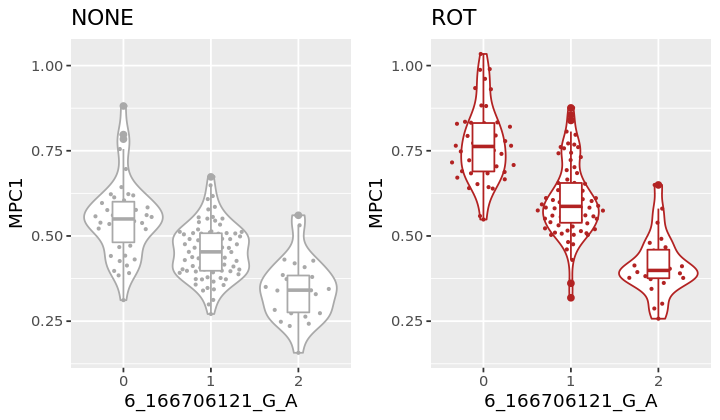

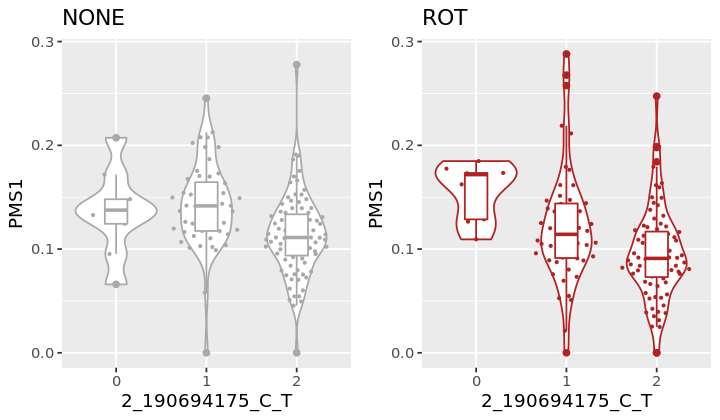

[1] 0.4730286 0.3180682
[1] "ZNF506"


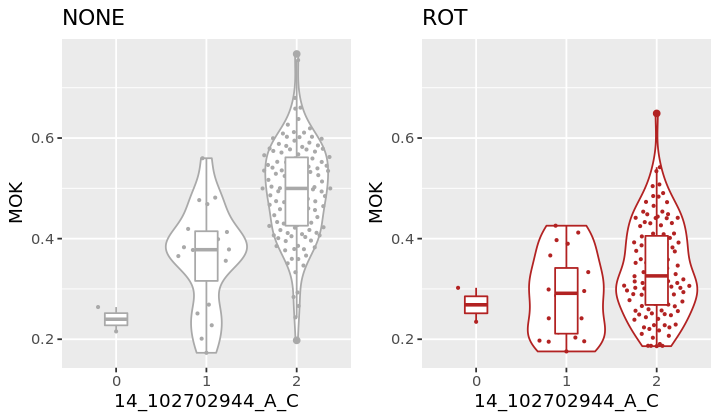

[1] 0.06258092 0.06739801
[1] "CECR1"


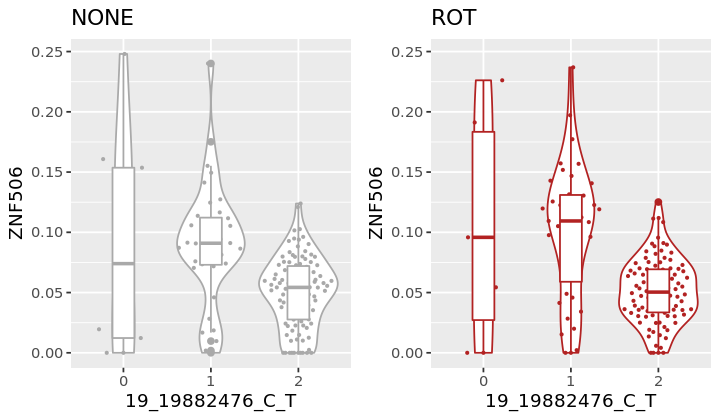

[1] 0.09886333 0.11539881
[1] "TMEM38B"
[1] 0.1597593 0.2785017
[1] "FAM118A"


Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 7 rows containing missing values (position_quasirandom).”

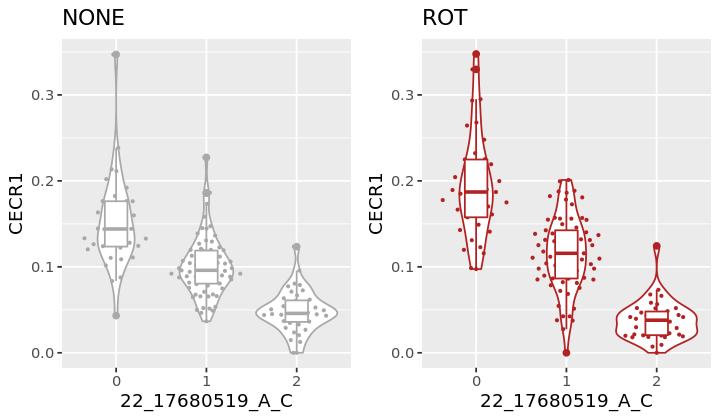

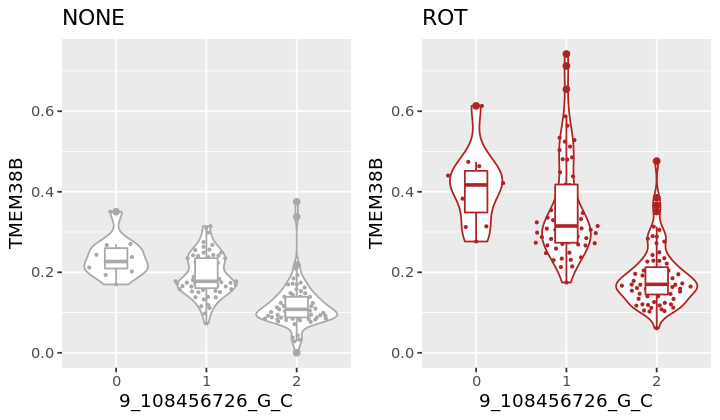

[1] 0.2303905 0.1727177
[1] "DNAJC15"


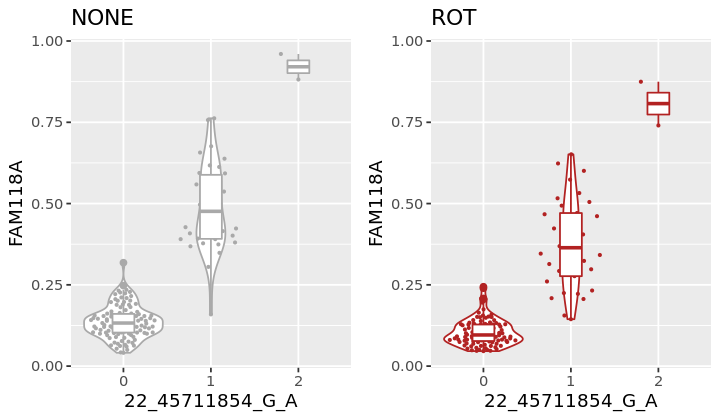

[1] 0.3578834 0.2239008
[1] "TAMM41"


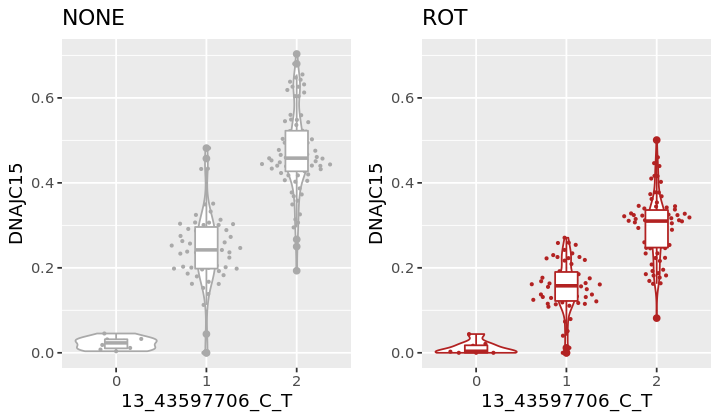

[1] 0.05788989 0.04103937
[1] "APIP"


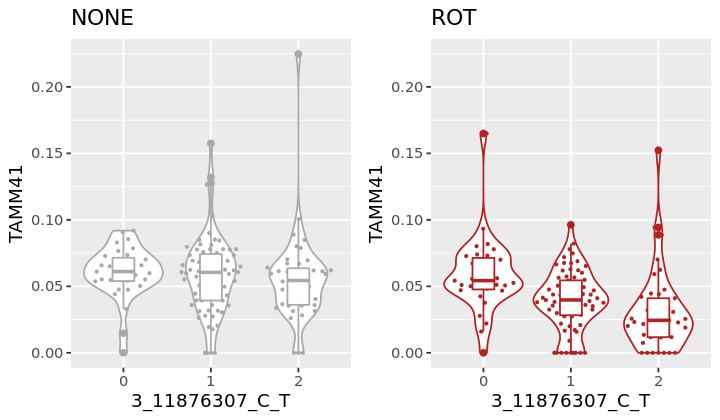

[1] 0.1911034 0.1786088
[1] "RASGRP3"


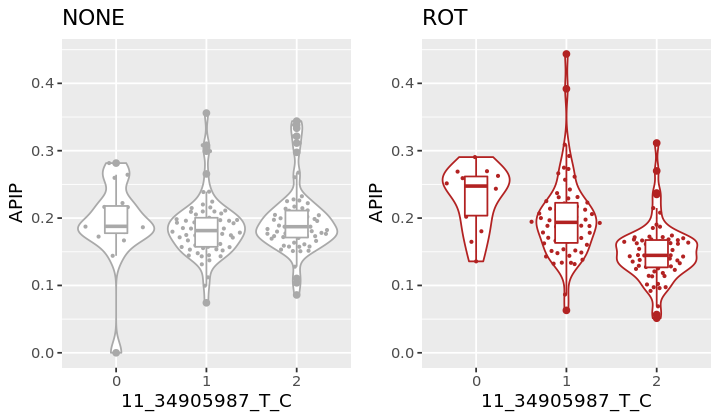

[1] 0.04087854 0.06320086
[1] "TMEM68"


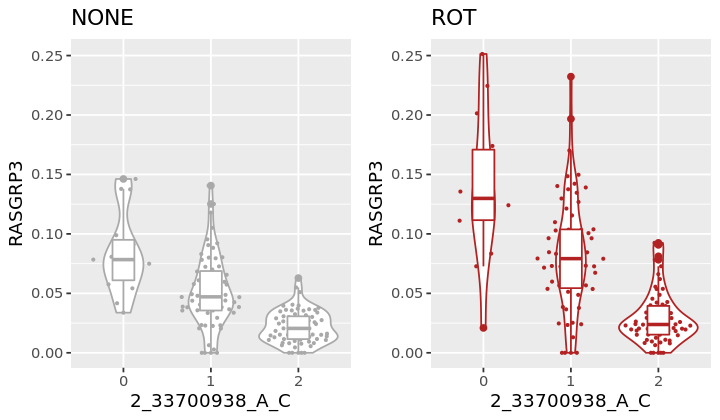

[1] 0.2516054 0.2700061
[1] "FABP6"


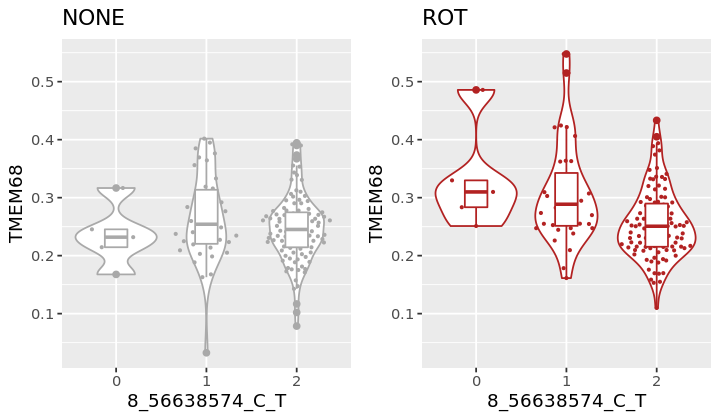

[1] 0.600487 0.571015
[1] "ZFAND2A"
[1] 0.08915292 0.04443584
[1] "CCDC66"


Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 7 rows containing missing values (position_quasirandom).”

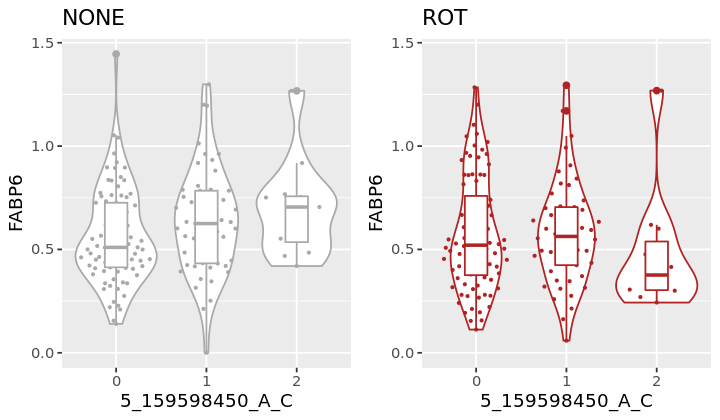

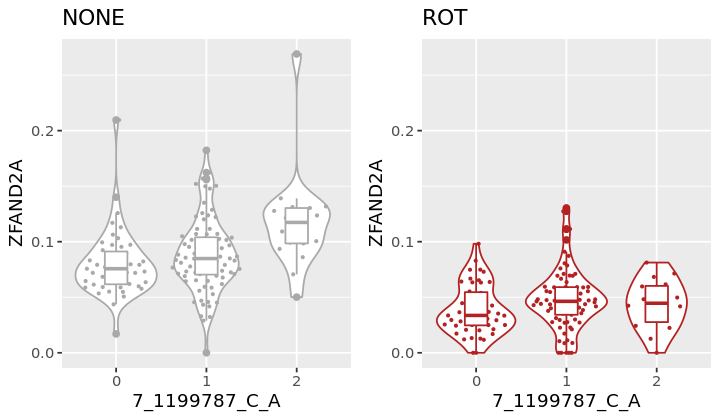

[1] 0.3070160 0.2014787
[1] "ZNF587"
[1] 0.06584371 0.06440663
[1] "ARL16"


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing missing values (position_quasirandom).”

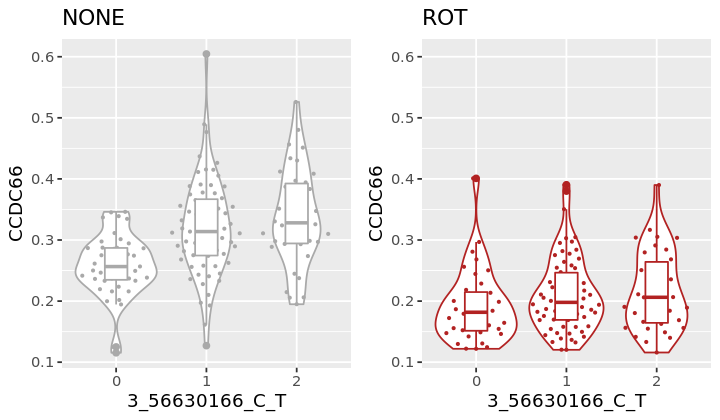

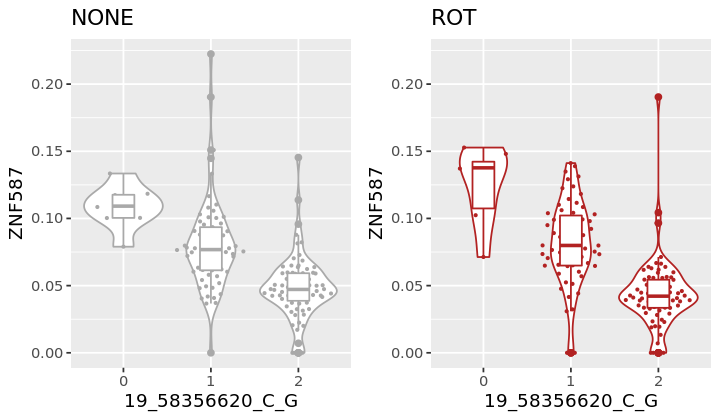

[1] 0.4361334 0.3677428


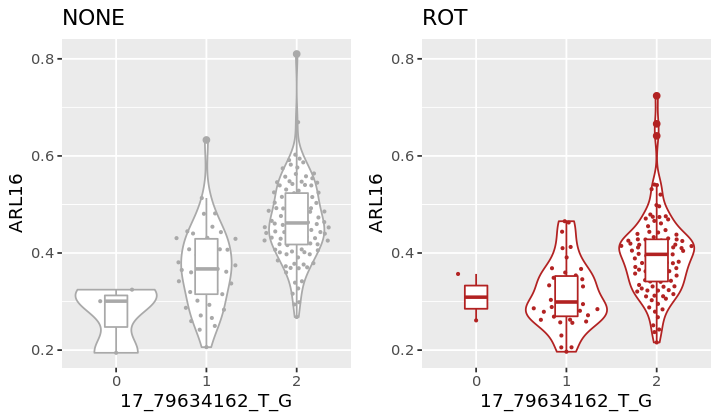

In [10]:
for (i in 1:length(snps_positive)){
#     print(i)
    snp = as.character(snps_positive[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
#     print(gene)
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    print(gene_name)
    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    e1 = e_noROT[,c("donor_id",gene_name)]
    e1$donor_id = as.character(e1$donor_id)
    df1 = inner_join(e1,g,by = "donor_id")
    colnames(df1)[2] = "gene"
    df1$genotypes <- round(df1$dosages)
#     print(head(df1,2))
    e2 = e_ROT[,c("donor_id",gene_name)]
    e2$donor_id = as.character(e2$donor_id)
    df2 = inner_join(e2,g,by = "donor_id")
    colnames(df2)[2] = "gene"
    df2$genotypes <- round(df2$dosages)
#     print(head(df2,2))   
    m = min(min(df1$gene),min(df1$gene))
    M = max(max(df1$gene),max(df2$gene))
    p1 = ggplot(df1, aes(x = as.factor(genotypes), y = gene)) +  geom_violin(col = col_NONE) + 
                xlab(snp) + ylab(gene_name) +  geom_quasirandom(size = 0.5, col = col_NONE) + 
                geom_boxplot(width = 0.25, col = col_NONE) + ylim(c(m,M)) + ggtitle("NONE")
    p2 = ggplot(df2, aes(x = as.factor(genotypes), y = gene))  + geom_violin(col = col_ROT) + 
                xlab(snp) + ylab(gene_name) + geom_quasirandom(size = 0.5, col = col_ROT) + 
                geom_boxplot(width = 0.25, col = col_ROT) + ylim(c(m,M)) +  ggtitle("ROT")
    options(repr.plot.width=6, repr.plot.height=3.5)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
    print(c(mean(df1$gene),mean(df2$gene)))
}

[1] "MRPS34"
[1] 0.431653 0.330100
[1] "PHYH"


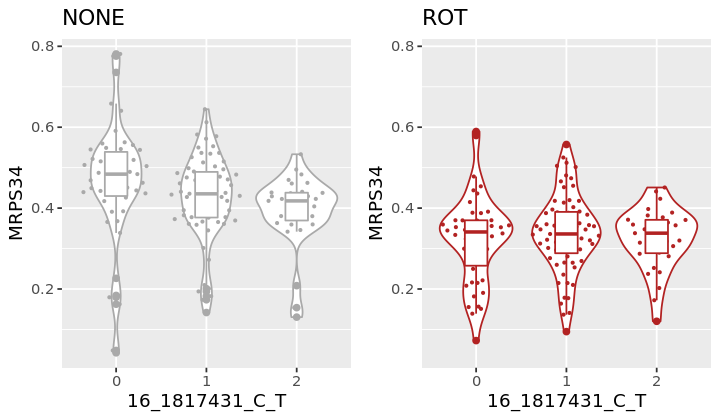

[1] 0.1885905 0.2911359
[1] "SPSB2"


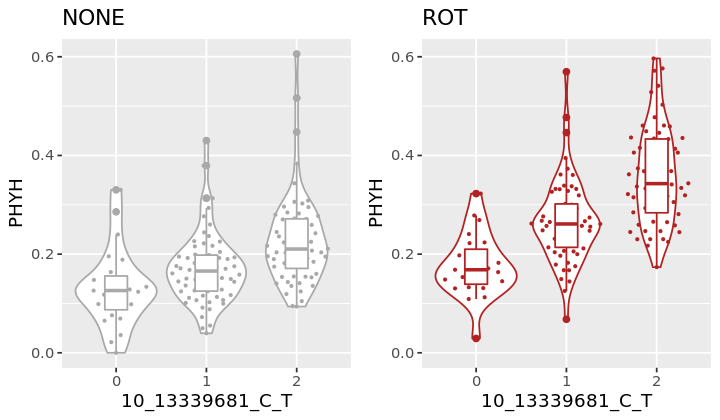

[1] 0.11119042 0.05589698
[1] "PYROXD2"
[1] 0.06005434 0.03971489
[1] "ITPA"


Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 9 rows containing missing values (position_quasirandom).”

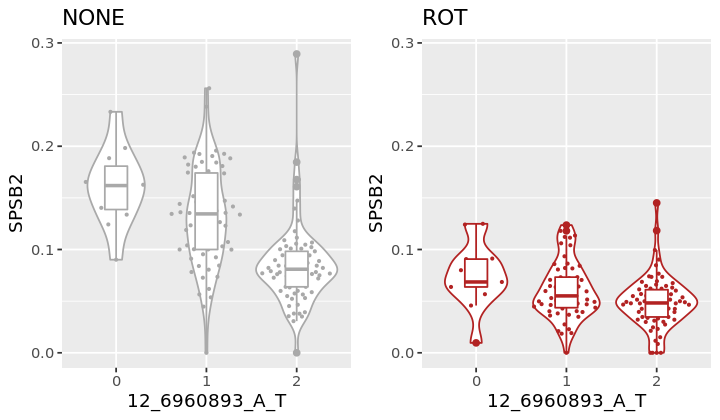

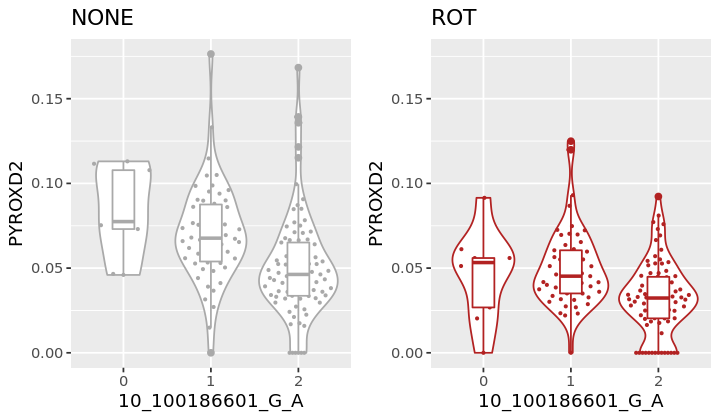

[1] 0.3553587 0.2637671
[1] "NEK3"


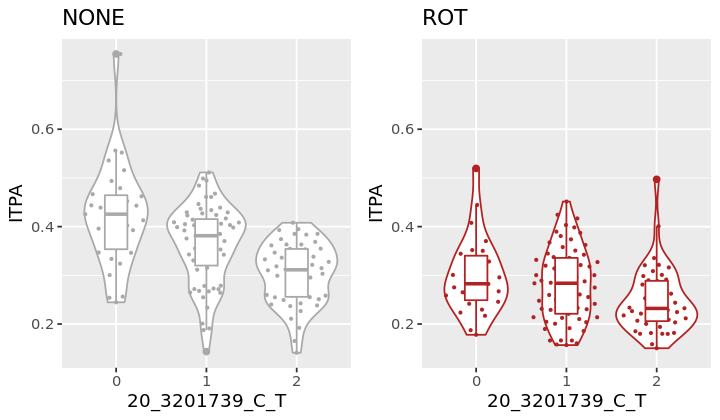

[1] 0.08032471 0.07693447
[1] "DGKB"


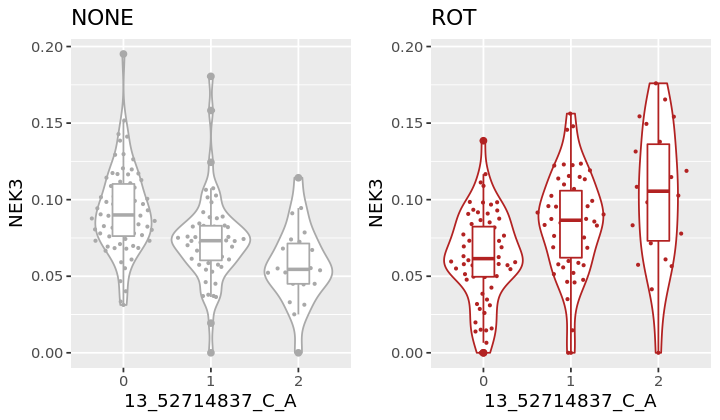

[1] 0.03872369 0.03350803
[1] "THNSL2"


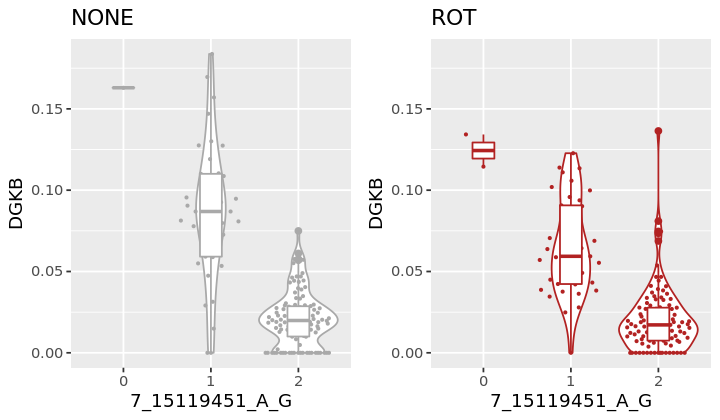

[1] 0.14607614 0.09030559
[1] "CCDC58"


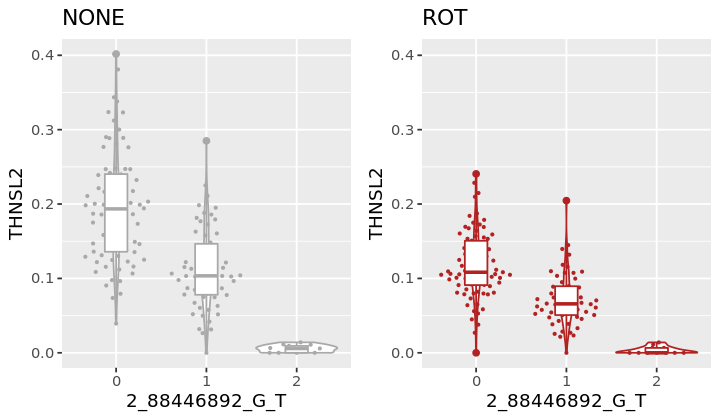

[1] 0.08405744 0.04673250
[1] "GNL3"


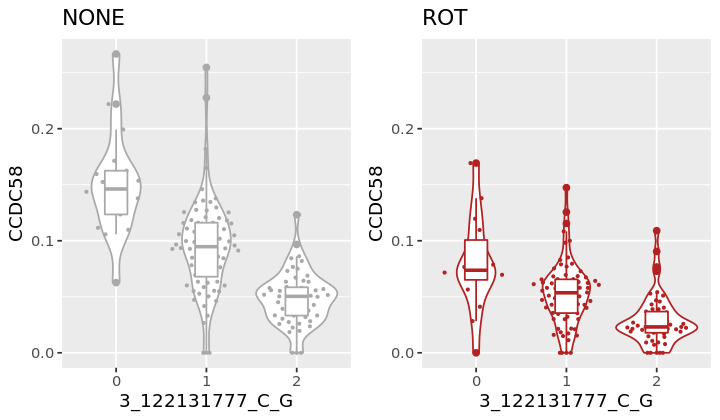

[1] 0.2313144 0.2271066
[1] "GPR171"
[1] 0.004690883 0.003639356
[1] "TIMM22"


Warning message:
“Removed 8 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 8 rows containing missing values (position_quasirandom).”

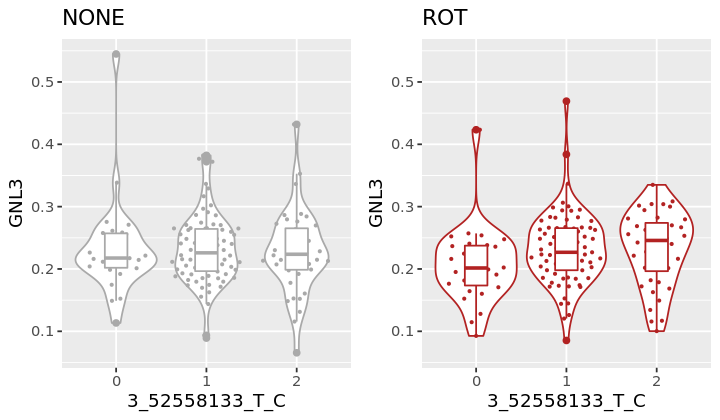

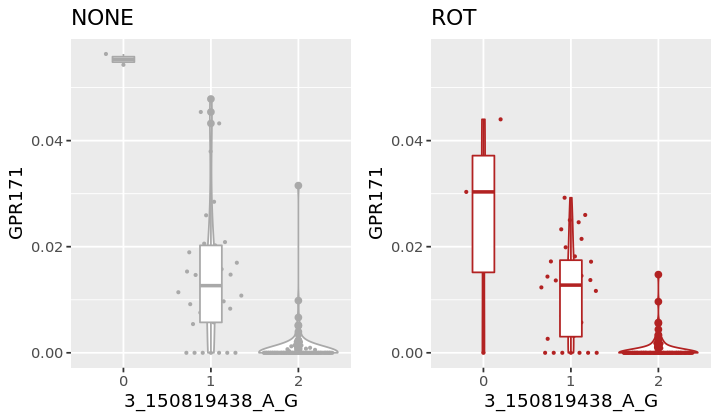

[1] 0.2088576 0.1344587
[1] "LSM10"
[1] 0.3360783 0.3771162


Warning message in `==.default`(annos$feature_id, as.character(gene)):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”

[1] "RPL41"


Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (position_quasirandom).”

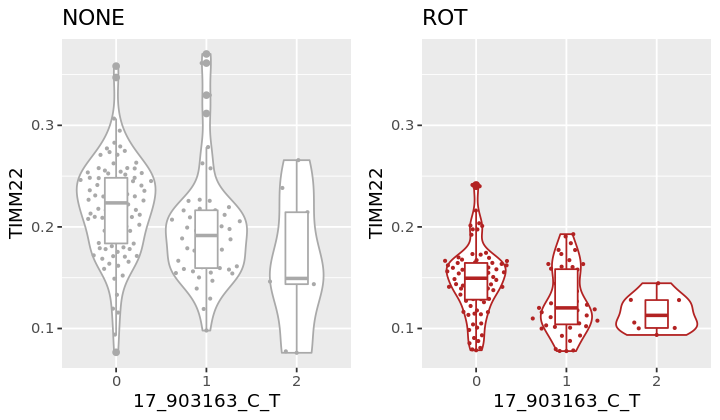

[1] 4.233142 4.245356
[1] "RPL10A"


Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing missing values (position_quasirandom).”

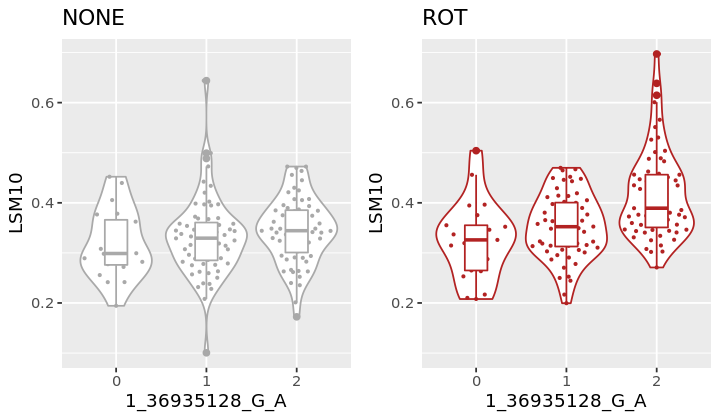

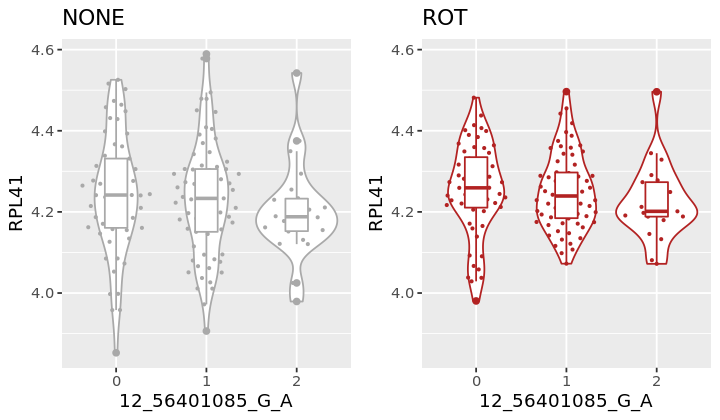

[1] 2.717926 2.713899
[1] "C7orf73"


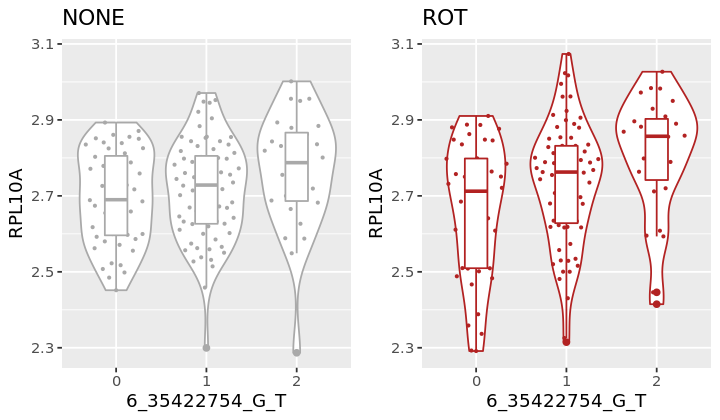

[1] 1.132557 1.191198


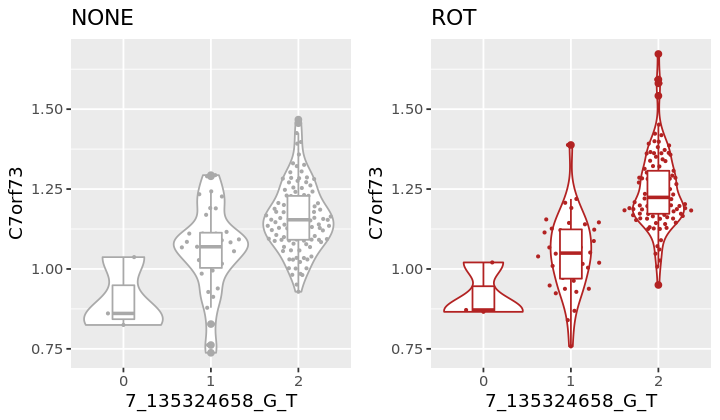

In [11]:
for (i in 1:length(snps_negative)){
#     print(i)
    snp = as.character(snps_negative[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
#     print(gene)
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    print(gene_name)
    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    e1 = e_noROT[,c("donor_id",gene_name)]
    e1$donor_id = as.character(e1$donor_id)
    df1 = inner_join(e1,g,by = "donor_id")
    colnames(df1)[2] = "gene"
    df1$genotypes <- round(df1$dosages)
#     print(head(df1,2))
    e2 = e_ROT[,c("donor_id",gene_name)]
    e2$donor_id = as.character(e2$donor_id)
    df2 = inner_join(e2,g,by = "donor_id")
    colnames(df2)[2] = "gene"
    df2$genotypes <- round(df2$dosages)
#     print(head(df2,2))   
    m = min(min(df1$gene),min(df1$gene))
    M = max(max(df1$gene),max(df2$gene))
    p1 = ggplot(df1, aes(x = as.factor(genotypes), y = gene)) +  geom_violin(col = col_NONE) + 
                xlab(snp) + ylab(gene_name) +  geom_quasirandom(size = 0.5, col = col_NONE) + 
                geom_boxplot(width = 0.25, col = col_NONE) + ylim(c(m,M)) + ggtitle("NONE")
    p2 = ggplot(df2, aes(x = as.factor(genotypes), y = gene))  + geom_violin(col = col_ROT) + 
                xlab(snp) + ylab(gene_name) + geom_quasirandom(size = 0.5, col = col_ROT) + 
                geom_boxplot(width = 0.25, col = col_ROT) + ylim(c(m,M)) +  ggtitle("ROT")
    options(repr.plot.width=6, repr.plot.height=3.5)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
    print(c(mean(df1$gene),mean(df2$gene)))
}

In [12]:
####### alternative visualisation

In [13]:
e = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery/celltype_Epen1/treatment_interaction_test_ncellfilter_top_qtl_results_all/phenotypes.tsv"
cov = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery/celltype_Epen1/treatment_interaction_test_ncellfilter_top_qtl_results_all/covariates.tsv"

In [14]:
e = read.csv(e,sep='\t')
cov = read.csv(cov,sep='\t')

In [15]:
head(e,2)
rownames(e) <- e$ensembl_gene_id
e$ensembl_gene_id <- c()
head(e,2)
head(cov,2)

ensembl_gene_id HPSI0114i.eipl_1_NONE HPSI0114i.eipl_1_ROT
1 ENSG00000261657 0.2236467             0.21275876          
2 ENSG00000227640 0.1376726             0.07313044          
  HPSI0114i.kolf_2_NONE HPSI0114i.kolf_2_ROT HPSI0115i.aoxv_1_NONE
1 0.20077565            0.22213624           0.22510622           
2 0.02298598            0.02130286           0.03209313           
  HPSI0115i.aoxv_1_ROT HPSI0115i.bimq_4_NONE HPSI0115i.bimq_4_ROT
1 0.1914746            0.2518729             0.20923077          
2 0.0182564            0.0645172             0.01535925          
  HPSI0115i.hecn_6_NONE ⋯ HPSI1113i.bima_1_NONE HPSI1113i.bima_1_ROT
1 0.18888257            ⋯ 0.19227062            0.13094020          
2 0.02352866            ⋯ 0.03043788            0.01618015          
  HPSI1113i.hayt_3_NONE HPSI1113i.hayt_3_ROT HPSI1113i.podx_1_NONE
1 0.17835444            0.161756590          0.18736291           
2 0.00667009            0.002966756          0.02205377           
  HPSI1113i.podx_1_ROT HPSI1113i.vuud_2_NONE HPSI1113i.vuud_2_ROT
1 0.161626980          0.17229697            0.186192811         
2 0.007681403          0.03362325            0.006560776         
  HPSI1114i.kuul_1_NONE HPSI1114i.kuul_1_ROT
1 0.18857768            0.17570087          
2 0.03310082            0.02118956

HPSI0114i.eipl_1_NONE HPSI0114i.eipl_1_ROT
ENSG00000261657 0.2236467             0.21275876          
ENSG00000227640 0.1376726             0.07313044          
                HPSI0114i.kolf_2_NONE HPSI0114i.kolf_2_ROT
ENSG00000261657 0.20077565            0.22213624          
ENSG00000227640 0.02298598            0.02130286          
                HPSI0115i.aoxv_1_NONE HPSI0115i.aoxv_1_ROT
ENSG00000261657 0.22510622            0.1914746           
ENSG00000227640 0.03209313            0.0182564           
                HPSI0115i.bimq_4_NONE HPSI0115i.bimq_4_ROT
ENSG00000261657 0.2518729             0.20923077          
ENSG00000227640 0.0645172             0.01535925          
                HPSI0115i.hecn_6_NONE HPSI0115i.hecn_6_ROT ⋯
ENSG00000261657 0.18888257            0.14062938           ⋯
ENSG00000227640 0.02352866            0.02415459           ⋯
                HPSI1113i.bima_1_NONE HPSI1113i.bima_1_ROT
ENSG00000261657 0.19227062            0.13094020          
ENSG00000227640 0.03043788            0.01618015          
                HPSI1113i.hayt_3_NONE HPSI1113i.hayt_3_ROT
ENSG00000261657 0.17835444            0.161756590         
ENSG00000227640 0.00667009            0.002966756         
                HPSI1113i.podx_1_NONE HPSI1113i.podx_1_ROT
ENSG00000261657 0.18736291            0.161626980         
ENSG00000227640 0.02205377            0.007681403         
                HPSI1113i.vuud_2_NONE HPSI1113i.vuud_2_ROT
ENSG00000261657 0.17229697            0.186192811         
ENSG00000227640 0.03362325            0.006560776         
                HPSI1114i.kuul_1_NONE HPSI1114i.kuul_1_ROT
ENSG00000261657 0.18857768            0.17570087          
ENSG00000227640 0.03310082            0.02118956

index                 PC2       PC3      PC4        PC5       PC6      
1 HPSI0114i-eipl_1_NONE -5.817446 7.035869  0.3538362 -2.674075 -3.642288
2 HPSI0114i-eipl_1_ROT  -5.668523 5.374868 -0.6661108 -1.921770 -3.466578
  PC7         PC8        PC9        PC10      treatment
1 -0.19854697 0.10215774 -0.1605767 0.6352158 0        
2  0.03369985 0.08163363  0.6037285 0.3523534 1

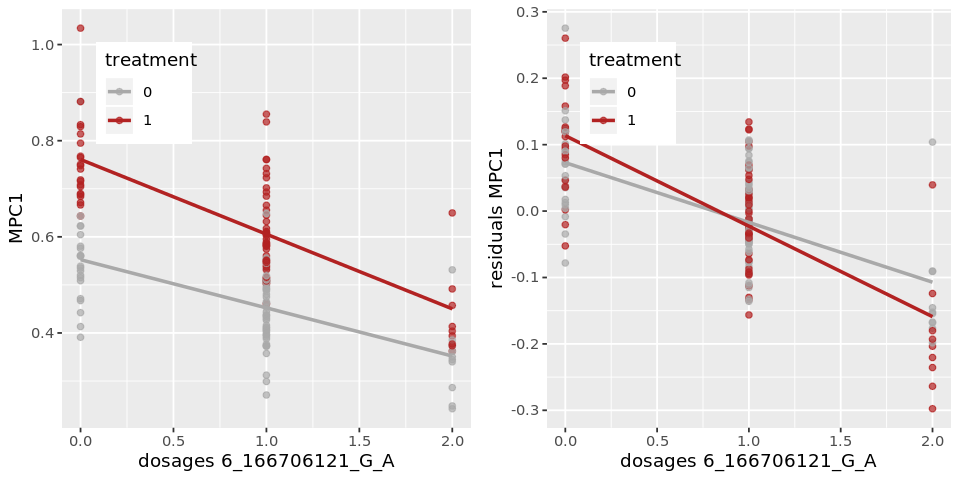

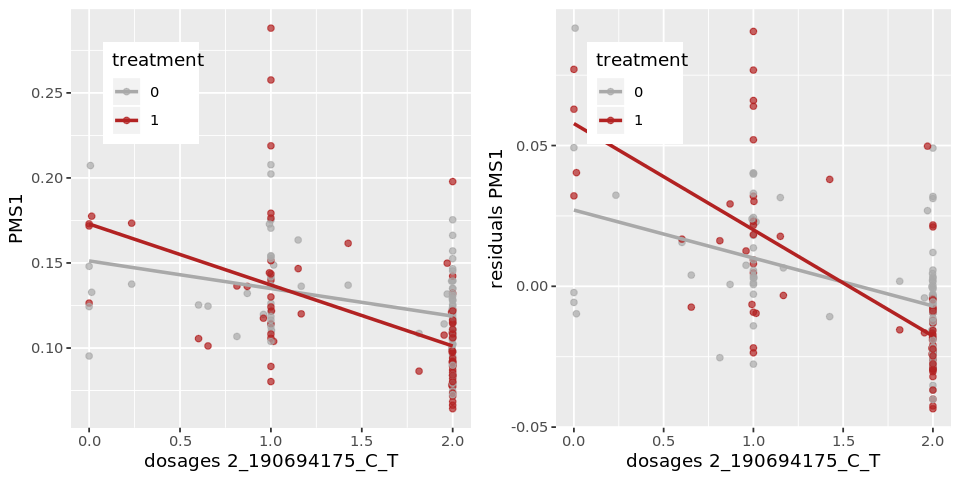

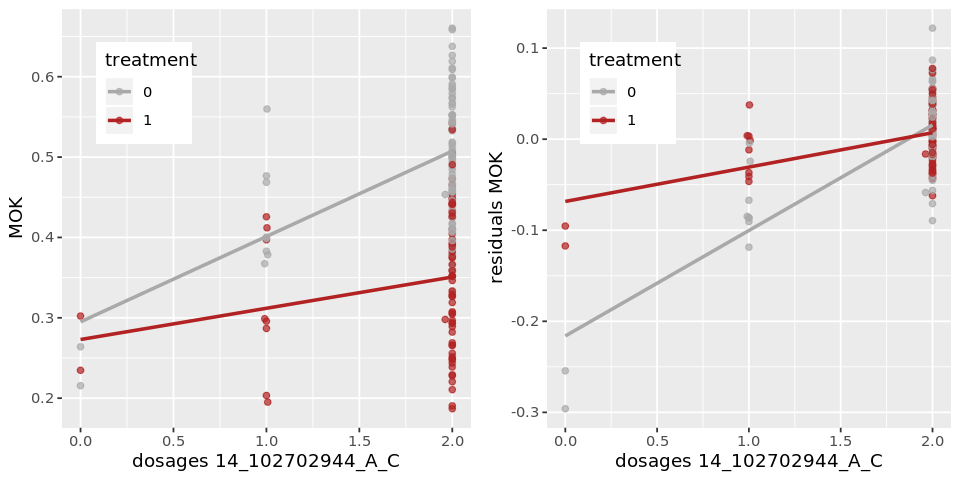

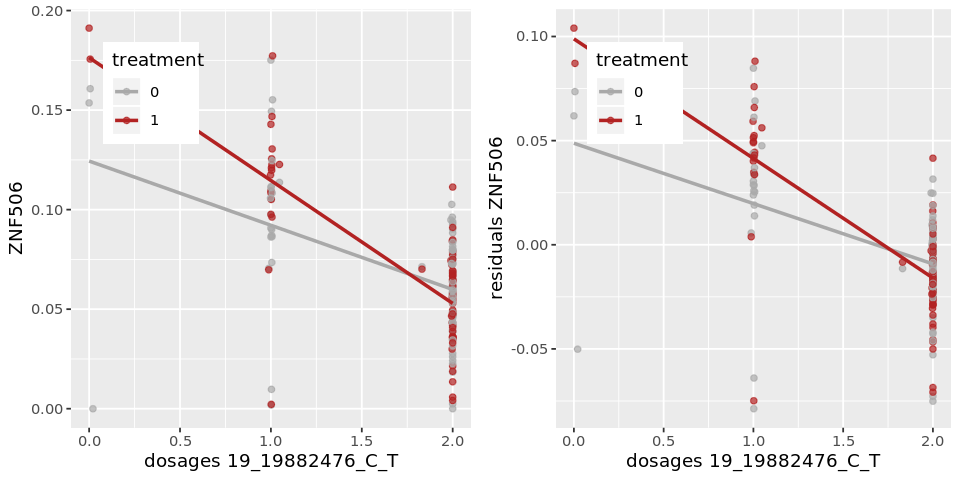

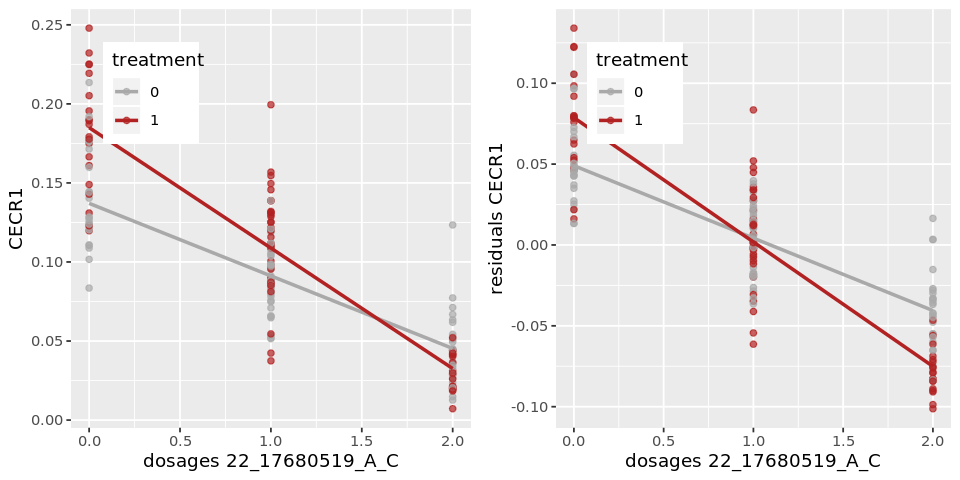

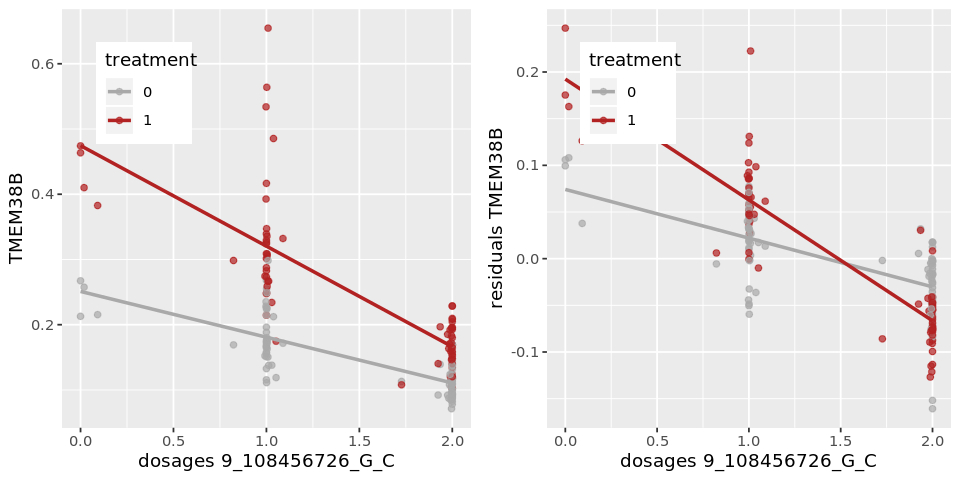

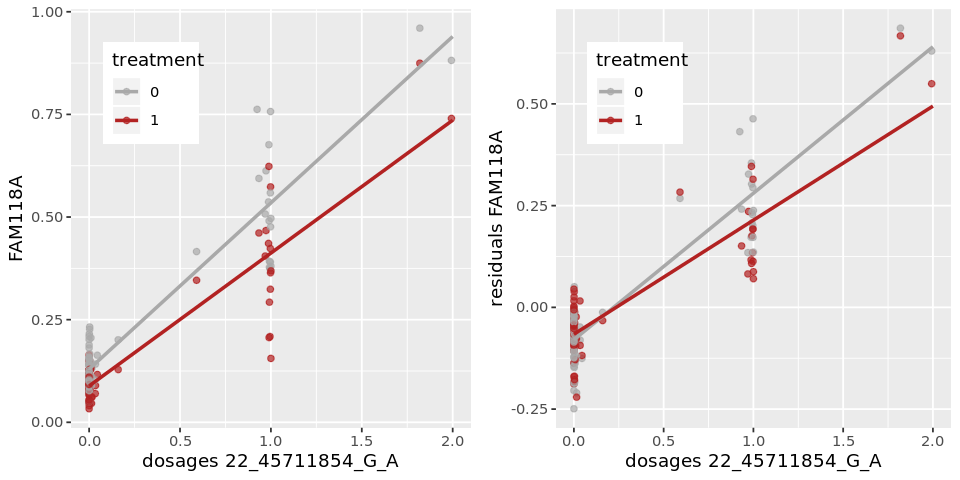

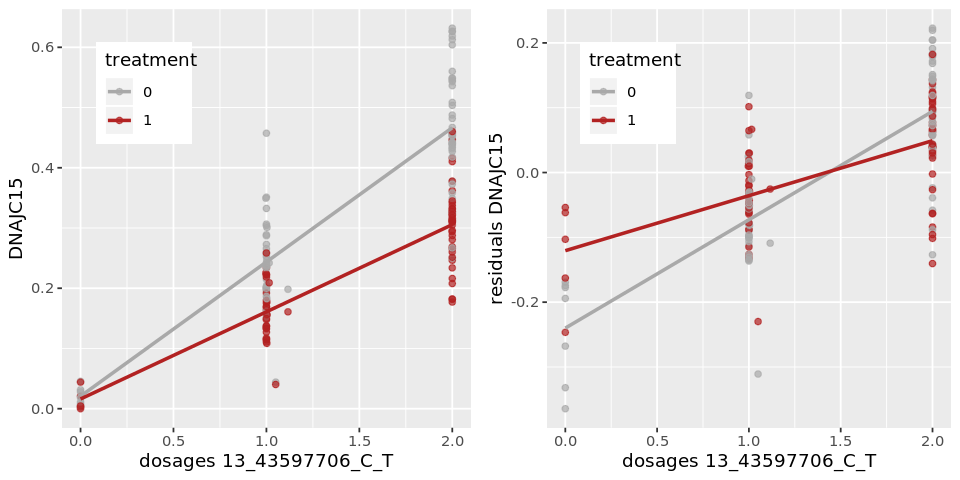

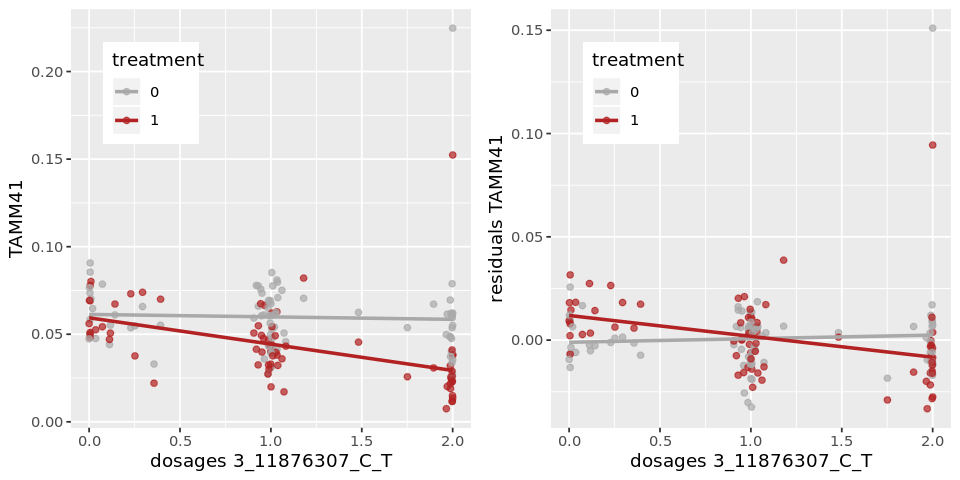

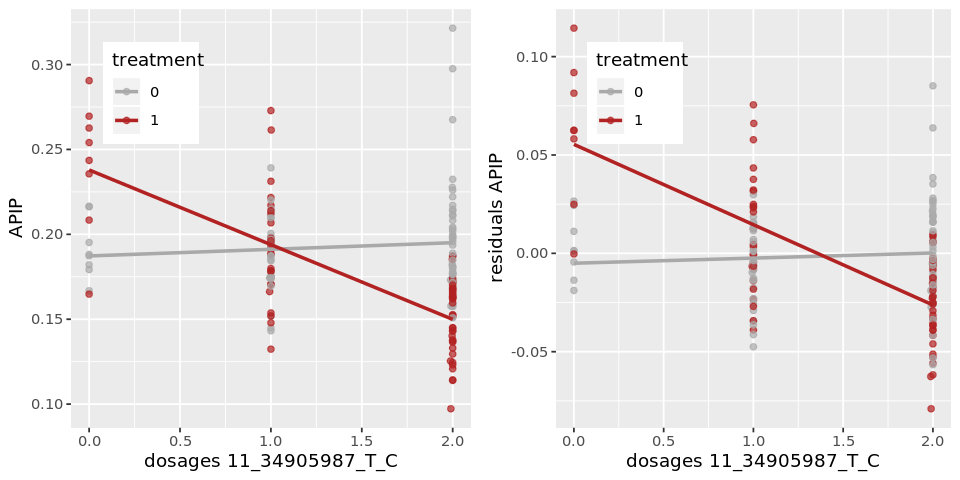

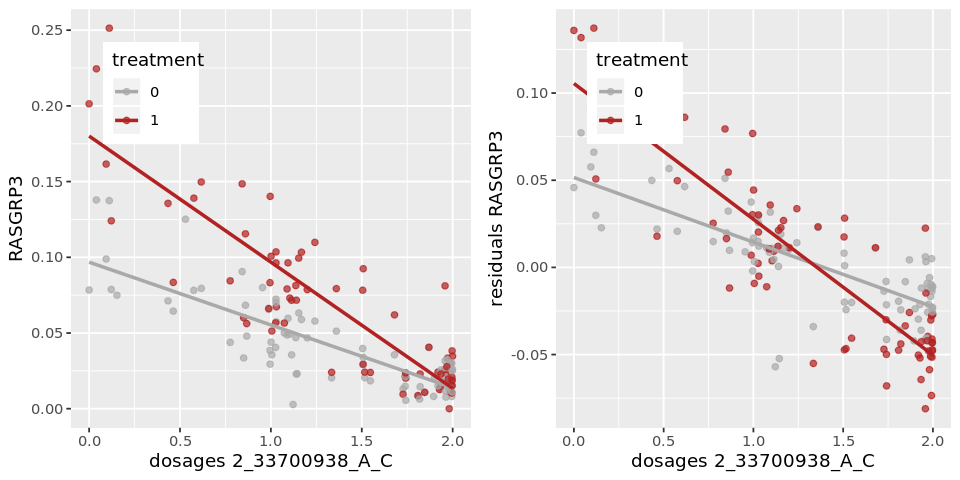

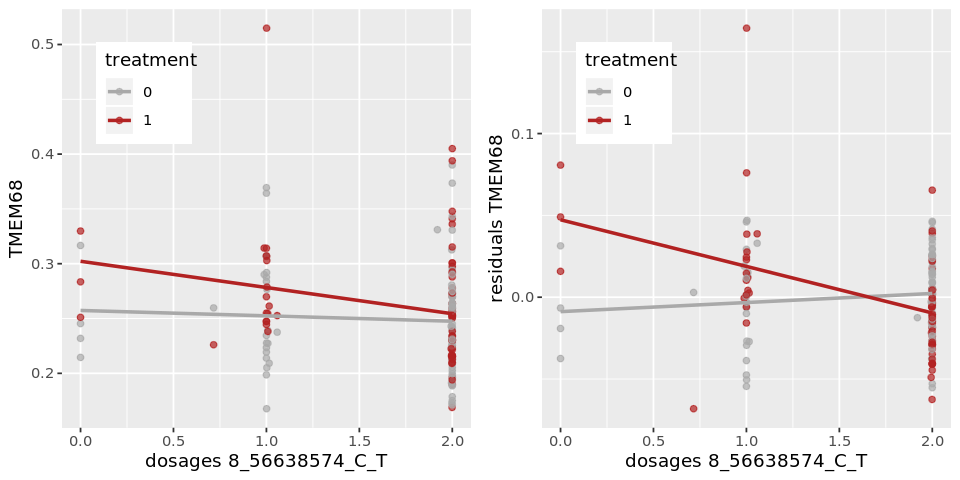

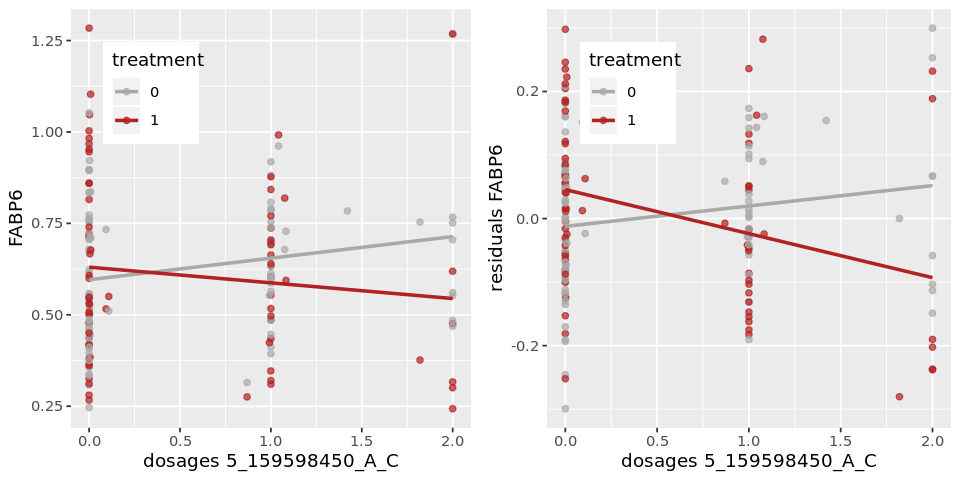

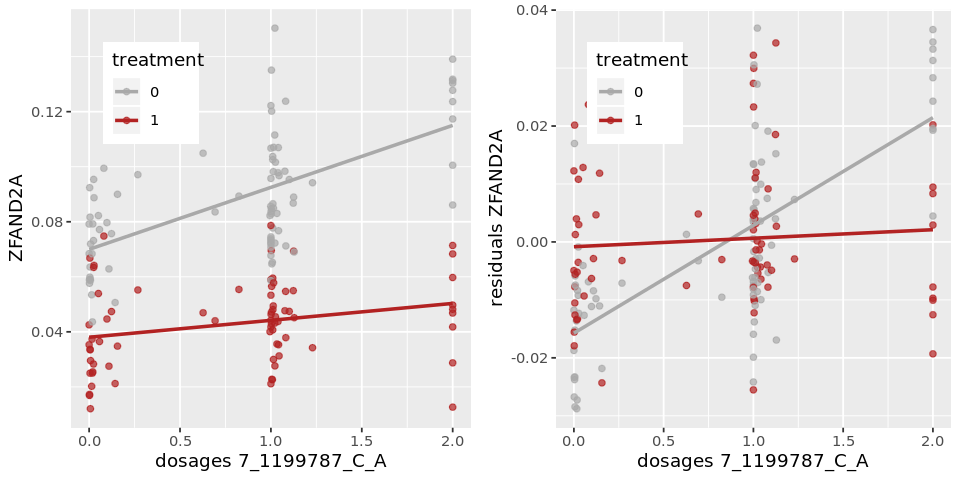

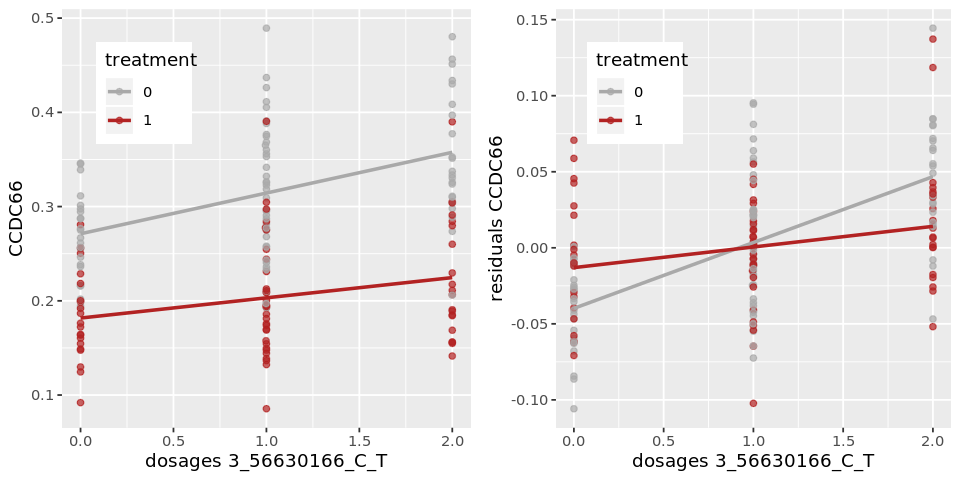

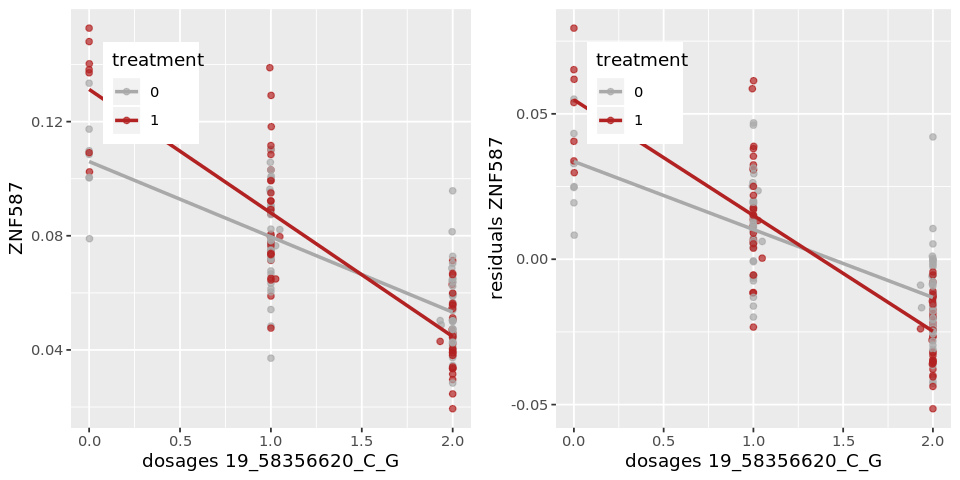

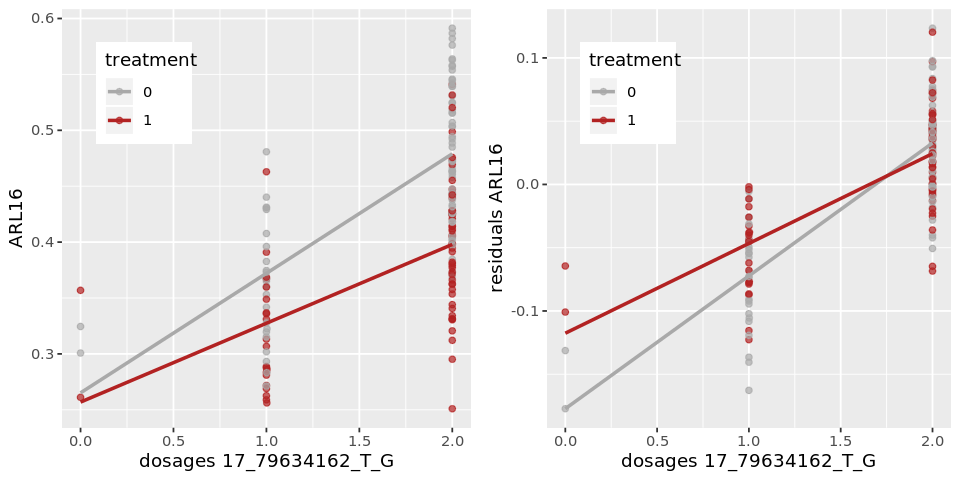

In [16]:
for (i in 1:length(snps_positive)){
#     print(i)
    snp = as.character(snps_positive[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    df_e = data.frame(gene = t(e[rownames(e) == gene,]), index = gsub("\\.","-",colnames(e)))
    colnames(df_e)[1] = "gene"
#     head(df_e)
    df_e2 = inner_join(df_e,as.data.frame(cov),by = "index")
#     head(df_e2,2)
    #### get residuals (more accurately what we test)
    mylm = lm(formula = gene ~ PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+treatment, data = df_e2)
    df_e2$res = mylm$residuals
    df_e2$donor_id = gsub("_NONE","",df_e2$index)
    df_e2$donor_id = gsub("_ROT","",df_e2$donor_id)
#     head(df_e2,2)
#     print(gene)

    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    df0 = inner_join(df_e2,g,by = "donor_id") 
    df0$genotypes <- round(df0$dosages)
    df0$treatment = as.factor(df0$treatment)
    p1 = ggplot(df0, aes(x = dosages, y = gene, col = treatment)) +  geom_point(alpha = 0.7) + 
        xlab(paste0("dosages ",snp)) + ylab(gene_name) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8)) + xlim(c(0,2))
    p2 = ggplot(df0, aes(x = dosages, y = res, col = treatment)) +  geom_point(alpha = 0.7) + xlim(c(0,2)) +
        xlab(paste0("dosages ",snp)) + ylab(paste0("residuals ",gene_name)) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8))
    
    options(repr.plot.width=8, repr.plot.height=4)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
}

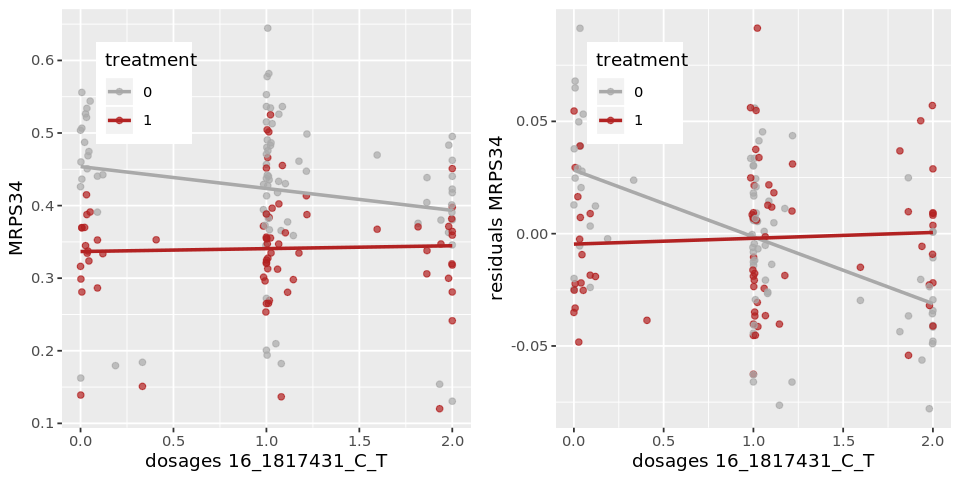

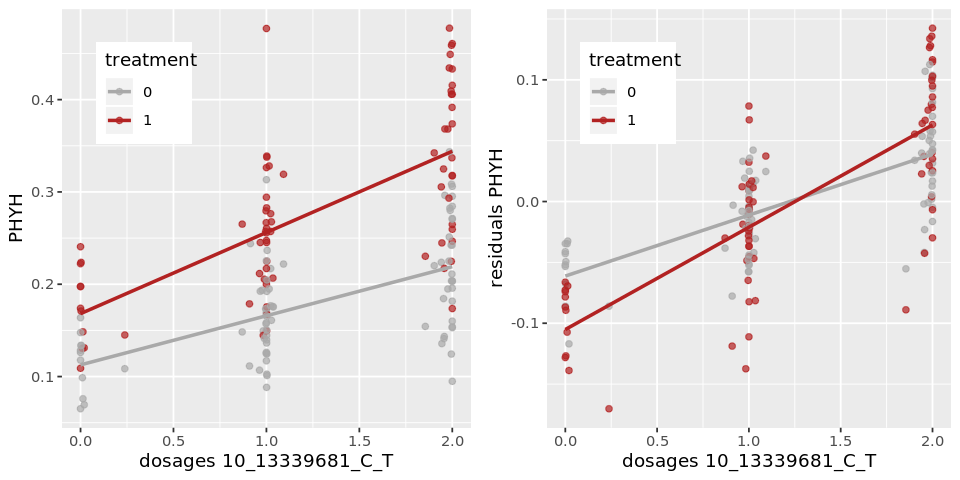

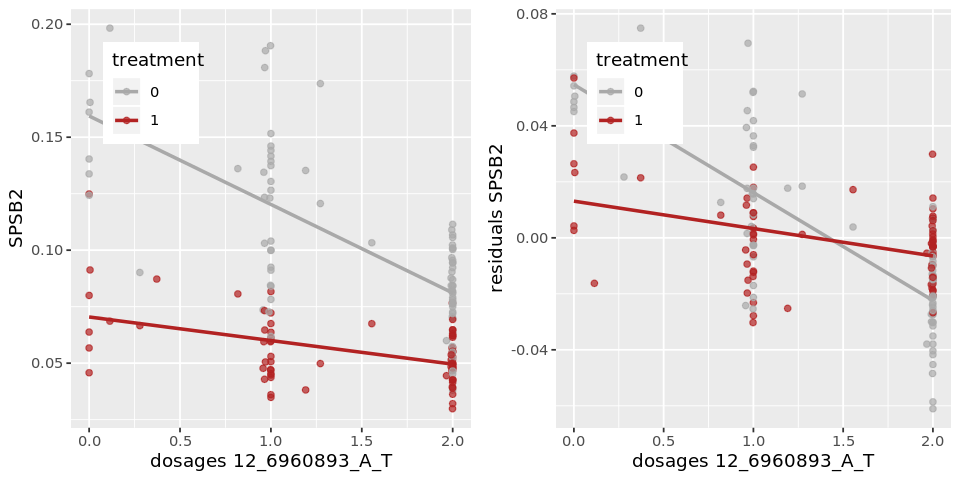

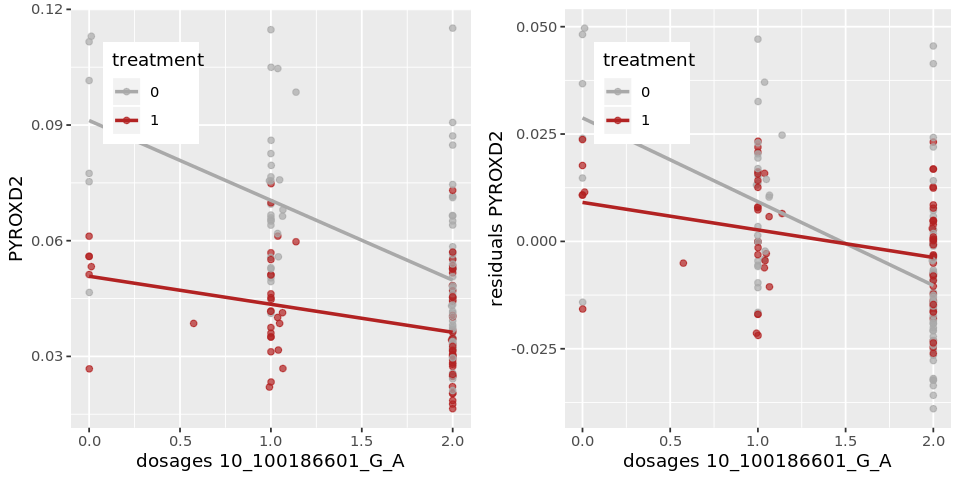

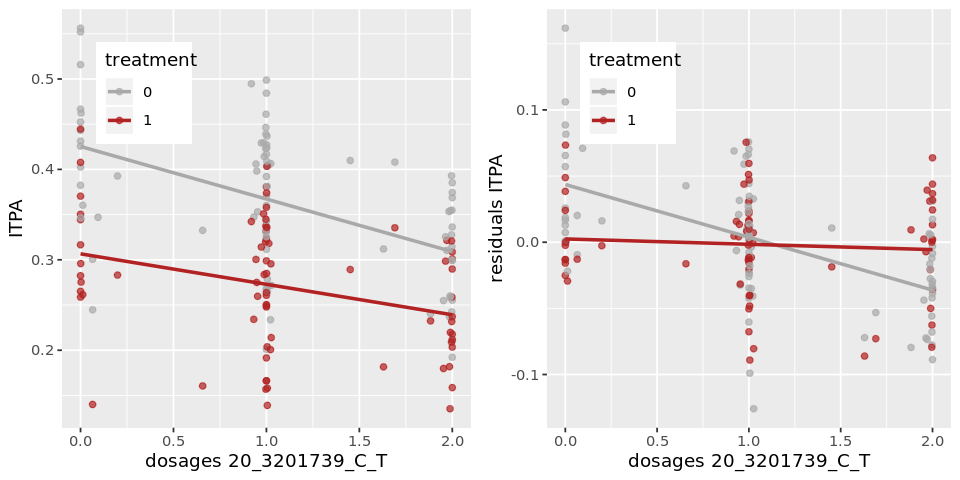

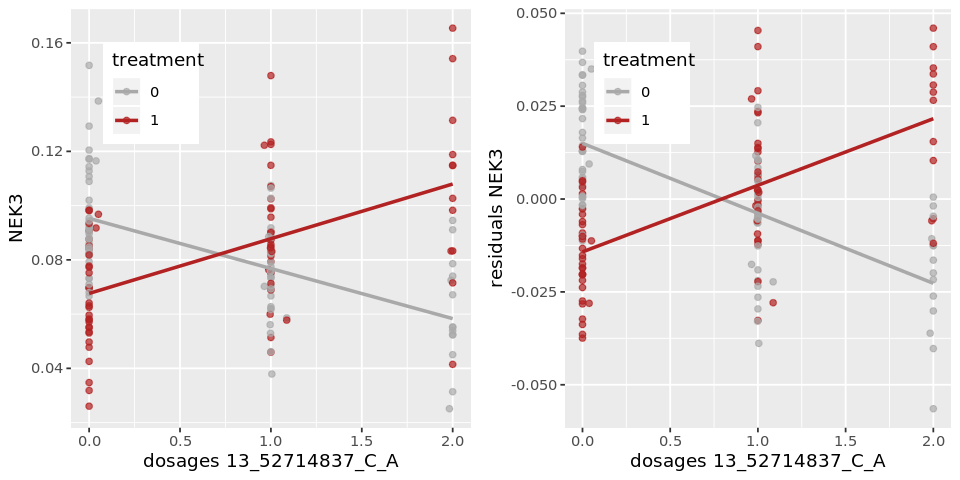

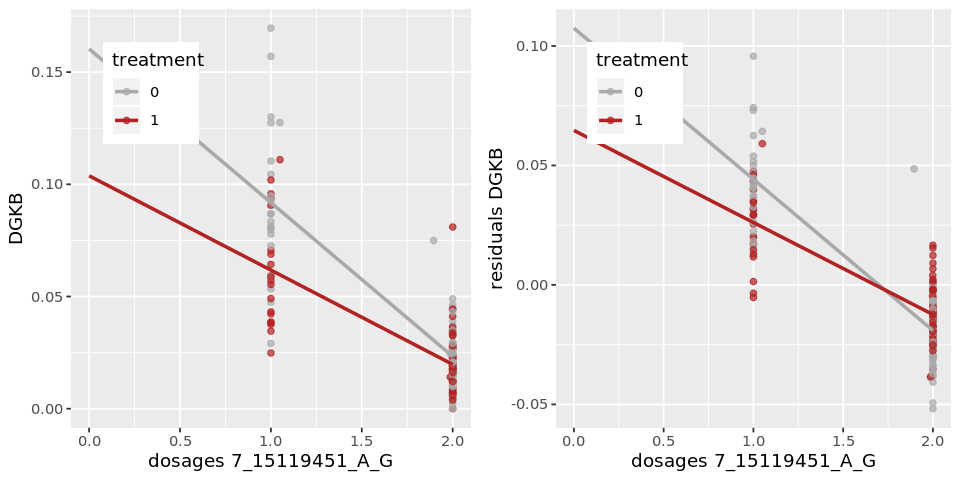

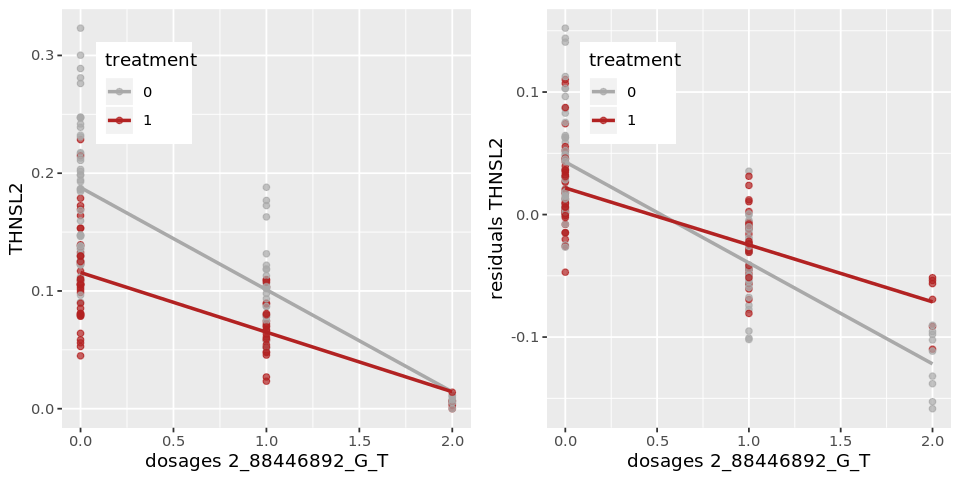

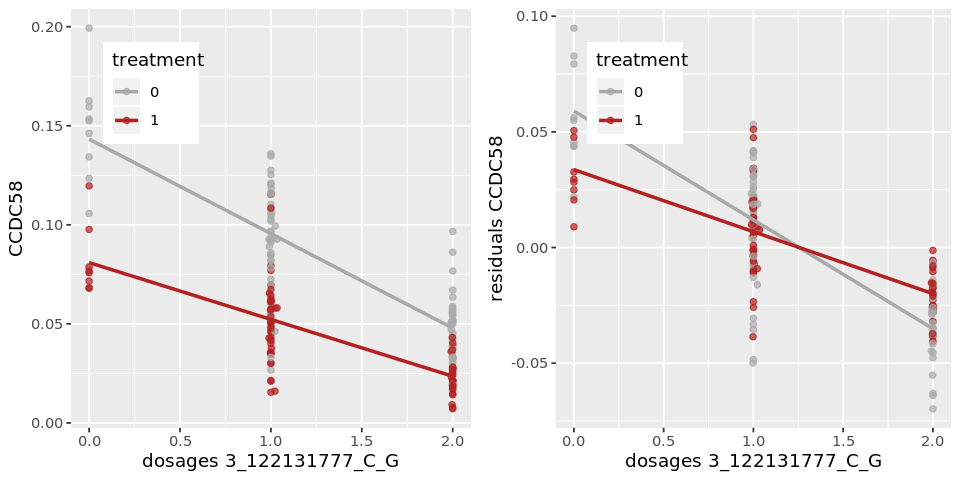

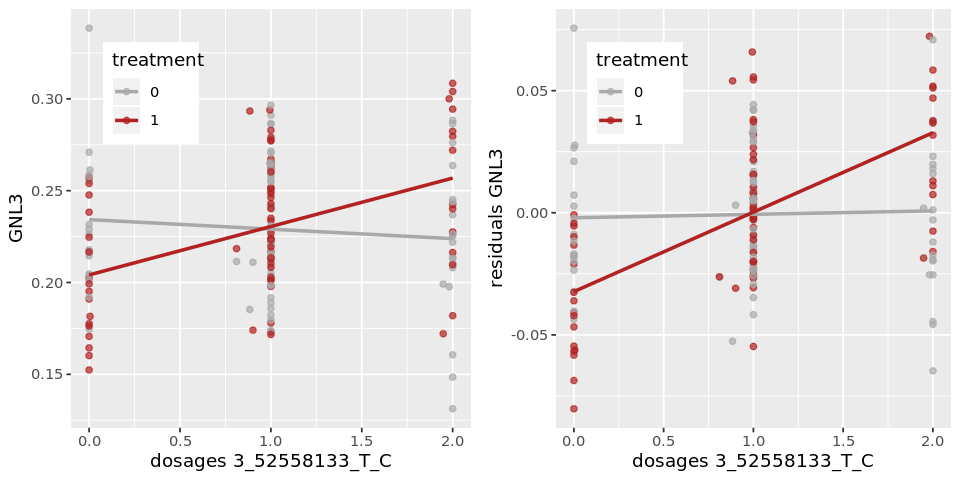

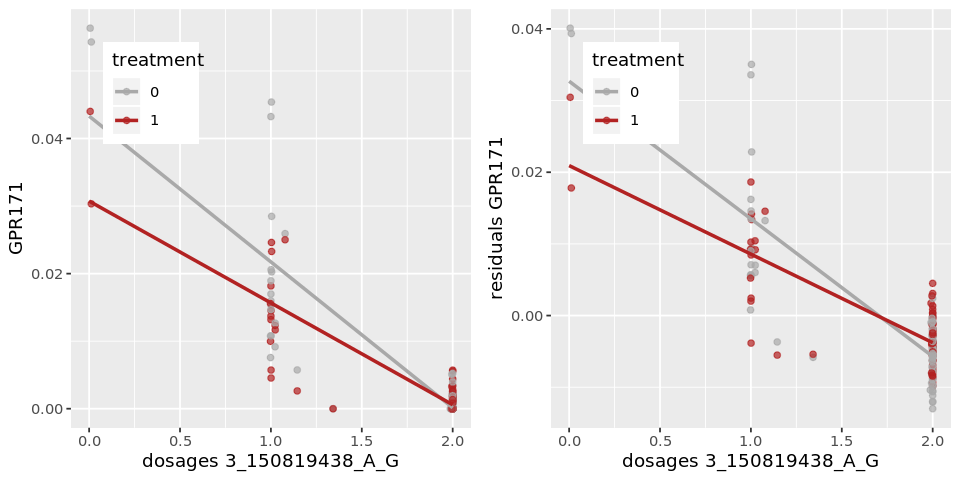

Warning message in `==.default`(annos$feature_id, as.character(gene)):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”

ERROR: `by` can't contain join column `index` which is missing from LHS

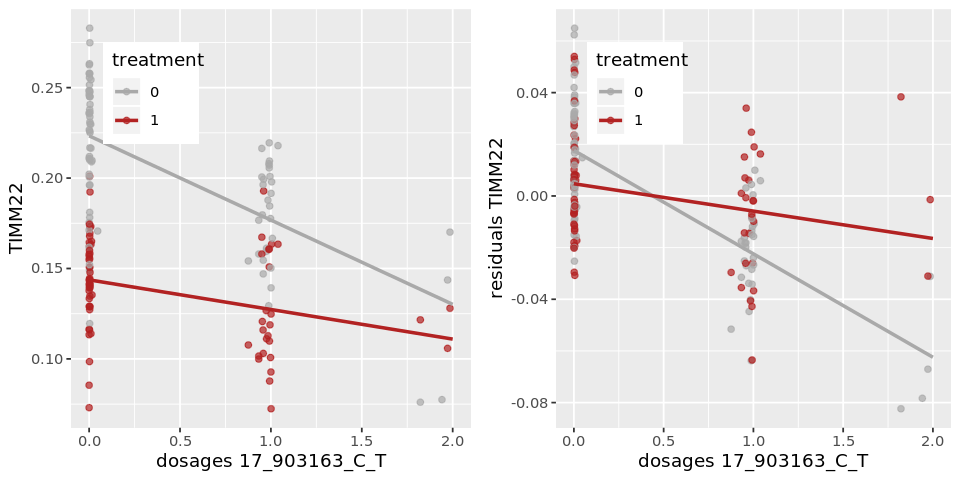

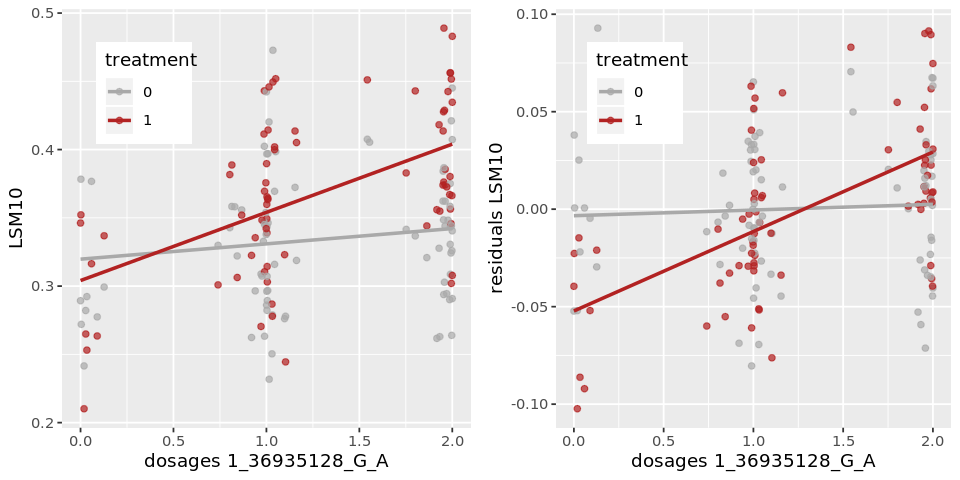

In [17]:
for (i in 1:length(snps_negative)){
#     print(i)
    snp = as.character(snps_negative[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    df_e = data.frame(gene = t(e[rownames(e) == gene,]), index = gsub("\\.","-",colnames(e)))
    colnames(df_e)[1] = "gene"
#     head(df_e)
    df_e2 = inner_join(df_e,as.data.frame(cov),by = "index")
#     head(df_e2,2)
    #### get residuals (more accurately what we test)
    mylm = lm(formula = gene ~ PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+treatment, data = df_e2)
    df_e2$res = mylm$residuals
    df_e2$donor_id = gsub("_NONE","",df_e2$index)
    df_e2$donor_id = gsub("_ROT","",df_e2$donor_id)
#     head(df_e2,2)
#     print(gene)

    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    df0 = inner_join(df_e2,g,by = "donor_id") 
    df0$genotypes <- round(df0$dosages)
    df0$treatment = as.factor(df0$treatment)
    p1 = ggplot(df0, aes(x = dosages, y = gene, col = treatment)) +  geom_point(alpha = 0.7) + 
        xlab(paste0("dosages ",snp)) + ylab(gene_name) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8)) + xlim(c(0,2))
    p2 = ggplot(df0, aes(x = dosages, y = res, col = treatment)) +  geom_point(alpha = 0.7) + xlim(c(0,2)) +
        xlab(paste0("dosages ",snp)) + ylab(paste0("residuals ",gene_name)) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8))
    
    options(repr.plot.width=8, repr.plot.height=4)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
}